In [49]:
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt

In [7]:
dataset = ds.fetch_olivetti_faces(shuffle = True)

In [26]:
data = dataset.data
labels = dataset.target

In [27]:
data.shape

(400, 4096)

In [28]:
labels.shape

(400,)

In [29]:
data = data.T
data.shape

In [41]:
X = data - np.mean(data, axis = 1)[:, None]

In [42]:
np.mean(X, axis = 1)

array([ 1.2099743e-07,  1.4618040e-07,  6.2137843e-08, ...,
       -1.5683472e-08, -1.1138618e-08, -3.3378601e-08], dtype=float32)

In [45]:
S = (1/X.shape[1])*(np.matmul(X, X.T))
S.shape

(4096, 4096)

In [53]:
w, v = np.linalg.eig(S)

Text(0,0.5,'eigen value')

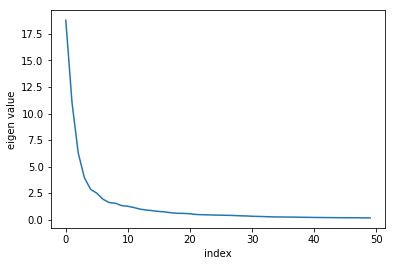

In [113]:
#sort in descending order of eigen values
idx = np.argsort(w)
idx = idx[::-1]
w_sorted = w[idx]
v_sorted = v[idx]
# top 50 eigen values
plt.plot(w[:50])
plt.xlabel('index')
plt.ylabel('eigen value')

In [110]:
#num of principal components to keep
k = 40
#Projection matrix
P = v_sorted[:, :k]
#Projected data
D = np.matmul(X.T, P)
D.shape

(400, 40)

In [111]:
#reconstruction
X_h = np.matmul(D, P.T)
X_h.shape

(400, 4096)

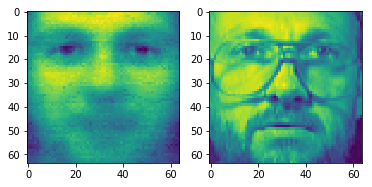

In [118]:
i = 0
x = data[:, i].reshape(64, 64)
xh = X_h[i].reshape(64, 64) + data.mean(axis = 1).reshape(64, 64)
plt.subplot(1, 2, 1)
plt.imshow(xh)
plt.subplot(1, 2, 2)
plt.imshow(x)

In [130]:
def divergence(b, V, Vh):
    if b == 0:
        return np.sum((V/Vh - np.log(V/Vh) - 1))
    elif b == 1:
        return np.sum(V*np.log(V/Vh) - V + Vh)
    else:
        return np.sum((1/(b*(b-1)))*(V**b + (b - 1)*Vh**b - b*V*Vh**(b - 1)))

In [146]:
#NMF - V ~ WH, W is the dictionary of k basis vectors and H is the matrix of coefficients
V = data
#number of basis vectors
k = 40
#dictionary of basis vectors
W = 0.01*np.random.uniform(0, 1, (data.shape[0], k))
#activations
H = 0.01*np.random.uniform(0, 1, (k, data.shape[1]))
#divergence type
b = 2

In [147]:
# multiplicative update algorithm for NMF
n_iters = 200
for i in range(n_iters):
    H = H*(np.matmul(W.T, (np.matmul(W, H)**(b-2))*V))/(np.matmul(W.T, (np.matmul(W, H)**(b-1))))
    W = W*(np.matmul(((np.matmul(W, H)**(b-2))*V), H.T))/(np.matmul((np.matmul(W, H)**(b-1)), H.T))
    Vh = np.matmul(W, H)
    d = divergence(b, V, Vh)
    if i % 20 == 0:
        print("iter = {}, divergence = {:.3f}".format(i, d))

iter = 0, divergence = 13050.624
iter = 20, divergence = 12209.948
iter = 40, divergence = 9480.080
iter = 60, divergence = 7380.232
iter = 80, divergence = 6215.181
iter = 100, divergence = 5430.042
iter = 120, divergence = 4878.434
iter = 140, divergence = 4481.842
iter = 160, divergence = 4185.100
iter = 180, divergence = 3955.410


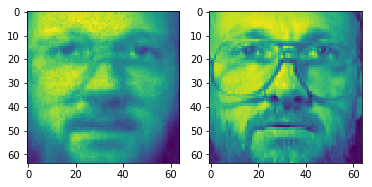

In [148]:
Vh = np.matmul(W, H)
i = 0
x = V[:, i].reshape(64, 64)
xh = Vh[:, i].reshape(64, 64)
plt.subplot(1, 2, 1)
plt.imshow(xh)
plt.subplot(1, 2, 2)
plt.imshow(x)

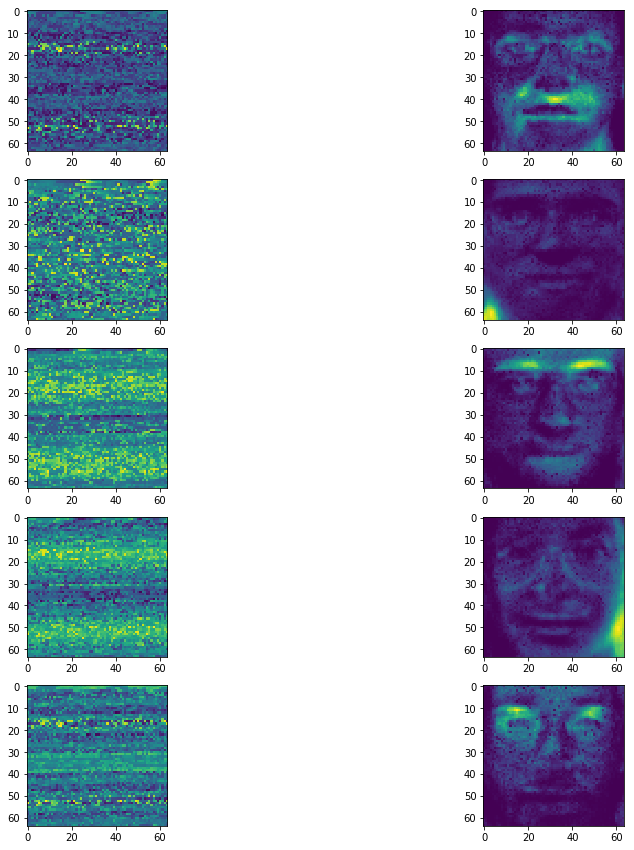

In [151]:
#compare principal components P and NMF dictionary W
idx = list(range(5))
figure = plt.figure(figsize = [15, 15])
for i in range(len(idx)):
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(P[:, idx[i]].reshape(64, 64))
    plt.subplot(5, 2, i*2 + 2)
    plt.imshow(W[:, idx[i]].reshape(64, 64))